# Лекция №4. Продолжаем работать с pandas: агрегация

Содержание:

1. Объединяем таблички
2. Агрегация
3. Строим графики

In [1]:
import pandas as pd

<br><br>

## 1. Объединяем таблички

In [2]:
a = pd.DataFrame(columns=['col1', 'col2'])
a.loc[len(a)] = [0, 5]
a.loc[len(a)] = [1, 3]
a.loc[len(a)] = [4, 8]


b = pd.DataFrame(columns=['col1', 'col2'])
b.loc[len(b)] = [2, 2]
b.loc[len(b)] = [6, 9]
b.loc[len(b)] = [1, 4]


c = pd.DataFrame(columns=['col1', 'col2'])
c.loc[len(c)] = [8, 99]
c.loc[len(c)] = [6, 2]

In [10]:
c

,col1,col2
0,8,99
1,6,2


In [7]:
pd.concat([a,b,c])

,col1,col2
0,0,5
1,1,3
2,4,8
0,2,2
1,6,9
2,1,4
0,8,99
1,6,2


In [11]:
pd.concat([a,b,c], ignore_index=True)

,col1,col2
0,0,5
1,1,3
2,4,8
3,2,2
4,6,9
5,1,4
6,8,99
7,6,2


In [13]:
titanic_data = pd.read_csv('/Users/magnitofon/Documents/JupyterNotebooks/hse-econ-data-analysis-course-2020/'\
                           'week_03/titanic_data.csv')
titanic_surv = pd.read_csv('/Users/magnitofon/Documents/JupyterNotebooks/hse-econ-data-analysis-course-2020/'\
                           'week_03/titanic_surv.csv')

In [14]:
titanic_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
titanic_surv

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Как объеденить? Наивный способ:

In [16]:
titanic_surv['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
titanic_data['Survived'] = titanic_surv['Survived']

In [21]:
titanic_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


**Есть нюансы**

In [22]:
table = pd.DataFrame(columns=['name', 'birthdate'])
table.loc[len(table)] = ['Vasya', '2000-12-12']
table.loc[len(table)] = ['Zhenya', '2000-01-29']
table.loc[len(table)] = ['Sasha', '2000-03-19']

table2 = pd.DataFrame(columns=['height'])
table2.loc[len(table2)] = ['175']
table2.loc[len(table2)] = ['170']
table2.loc[len(table2)] = ['180']

In [23]:
table

,name,birthdate
0,Vasya,2000-12-12
1,Zhenya,2000-01-29
2,Sasha,2000-03-19


In [24]:
table2

,height
0,175
1,170
2,180


In [25]:
table2.index = [2,1,0]

In [26]:
table2

,height
2,175
1,170
0,180


In [27]:
table['height'] = table2['height']

In [28]:
table

,name,birthdate,height
0,Vasya,2000-12-12,180
1,Zhenya,2000-01-29,170
2,Sasha,2000-03-19,175


In [30]:
table2['height'].values

array(['175', '170', '180'], dtype=object)

In [31]:
table['height'] = table2['height'].values

In [32]:
table

,name,birthdate,height
0,Vasya,2000-12-12,175
1,Zhenya,2000-01-29,170
2,Sasha,2000-03-19,180


In [33]:
table.index = ['a', 'b', 'c']

In [34]:
table

,name,birthdate,height
a,Vasya,2000-12-12,175
b,Zhenya,2000-01-29,170
c,Sasha,2000-03-19,180


In [35]:
table2['height']

2    175
1    170
0    180
Name: height, dtype: object

In [36]:
table['height'] = table2['height']

In [37]:
table

,name,birthdate,height
a,Vasya,2000-12-12,NaN
b,Zhenya,2000-01-29,NaN
c,Sasha,2000-03-19,NaN


In [ ]:
table

**Но что если:**

* хотим присоединить не одну колонку, а таблицу из множества колонок?
* что если число строк разное?

На помощь придёт `pd.merge`

In [38]:
table = pd.DataFrame(columns=['name', 'birthdate'])
table.loc[len(table)] = ['Vasya', '2000-12-12']
table.loc[len(table)] = ['Zhenya', '2000-01-29']
table.loc[len(table)] = ['Sasha', '2000-03-19']

table2 = pd.DataFrame(columns=['name', 'height', 'weight'])
table2.loc[len(table2)] = ['Sasha', 175, 50]
table2.loc[len(table2)] = ['Vasya', 170, 52]
table2.loc[len(table2)] = ['Zhenya', 180, 65]

In [39]:
table

,name,birthdate
0,Vasya,2000-12-12
1,Zhenya,2000-01-29
2,Sasha,2000-03-19


In [40]:
table2

,name,height,weight
0,Sasha,175,50
1,Vasya,170,52
2,Zhenya,180,65


In [41]:
pd.merge(table, table2, on='name')

,name,birthdate,height,weight
0,Vasya,2000-12-12,170,52
1,Zhenya,2000-01-29,180,65
2,Sasha,2000-03-19,175,50


In [42]:
pd.merge(table, table2, left_index=True, right_index=True)

,name_x,birthdate,name_y,height,weight
0,Vasya,2000-12-12,Sasha,175,50
1,Zhenya,2000-01-29,Vasya,170,52
2,Sasha,2000-03-19,Zhenya,180,65


При совпадающих колонках - появляется префикс

Итого:

* `pd.merge(df1, df2, left_index=True, right_index=True)` - соединяем по индексам обеих таблиц
* `pd.merge(df1, df2, left_on='left_col', right_on='right_col')` - соединяем по колонке `left_col` таблицы `df1` и по колонке `right_col` таблицы `df2`
* `pd.merge(df1, df2, on='common_col')` - соединяем по общему столбцу
* `pd.merge(df1, df2, on=['common_col_1', 'common_col_2'])` - можно по набору столбцов

<br><br>
**Что если значения разные?**

In [44]:
table = pd.DataFrame(columns=['name', 'birthdate'])
table.loc[len(table)] = ['Vasya', '2000-12-12']
table.loc[len(table)] = ['Zhenya', '2000-01-29']
table.loc[len(table)] = ['Sasha', '2000-03-19']
table.loc[len(table)] = ['Vovan', '2001-08-08']

table2 = pd.DataFrame(columns=['name', 'height', 'weight'])
table2.loc[len(table2)] = ['Sasha', 175, 50]
table2.loc[len(table2)] = ['Vasya', 170, 52]
table2.loc[len(table2)] = ['Zhenya', 180, 65]
table2.loc[len(table2)] = ['Kostyan', 190, 100]

In [45]:
table

,name,birthdate
0,Vasya,2000-12-12
1,Zhenya,2000-01-29
2,Sasha,2000-03-19
3,Vovan,2001-08-08


In [46]:
table2

,name,height,weight
0,Sasha,175,50
1,Vasya,170,52
2,Zhenya,180,65
3,Kostyan,190,100


In [49]:
pd.merge(table, table2, on='name', how='inner')

,name,birthdate,height,weight
0,Vasya,2000-12-12,170,52
1,Zhenya,2000-01-29,180,65
2,Sasha,2000-03-19,175,50


In [50]:
pd.merge(table, table2, on='name', how='outer')

,name,birthdate,height,weight
0,Vasya,2000-12-12,170,52
1,Zhenya,2000-01-29,180,65
2,Sasha,2000-03-19,175,50
3,Vovan,2001-08-08,NaN,NaN
4,Kostyan,NaN,190,100


In [51]:
pd.merge(table, table2, on='name', how='left')

,name,birthdate,height,weight
0,Vasya,2000-12-12,170,52
1,Zhenya,2000-01-29,180,65
2,Sasha,2000-03-19,175,50
3,Vovan,2001-08-08,NaN,NaN


In [53]:
pd.merge(table, table2, on='name', how='right')

,name,birthdate,height,weight
0,Sasha,2000-03-19,175,50
1,Vasya,2000-12-12,170,52
2,Zhenya,2000-01-29,180,65
3,Kostyan,NaN,190,100


#### Схема

![](https://cdn.softwaretestinghelp.com/wp-content/qa/uploads/2019/05/Capture-1.jpg)

**А что если будут повторы?**

In [59]:
table = pd.DataFrame(columns=['name', 'birthdate'])
table.loc[len(table)] = ['Vasya', '2000-12-12']
table.loc[len(table)] = ['Zhenya', '2000-01-29']
table.loc[len(table)] = ['Sasha', '2000-03-19']
table.loc[len(table)] = ['Sasha', '2001-08-08']
table.loc[len(table)] = ['Sasha', '2001-08-12']

table2 = pd.DataFrame(columns=['name', 'height', 'weight'])
table2.loc[len(table2)] = ['Sasha', 175, 50]
table2.loc[len(table2)] = ['Vasya', 170, 52]
table2.loc[len(table2)] = ['Zhenya', 180, 65]
table2.loc[len(table2)] = ['Sasha', 190, 100]

In [60]:
table

,name,birthdate
0,Vasya,2000-12-12
1,Zhenya,2000-01-29
2,Sasha,2000-03-19
3,Sasha,2001-08-08
4,Sasha,2001-08-12


In [61]:
table2

,name,height,weight
0,Sasha,175,50
1,Vasya,170,52
2,Zhenya,180,65
3,Sasha,190,100


In [62]:
pd.merge(table, table2, on='name', how='inner')

,name,birthdate,height,weight
0,Vasya,2000-12-12,170,52
1,Zhenya,2000-01-29,180,65
2,Sasha,2000-03-19,175,50
3,Sasha,2000-03-19,190,100
4,Sasha,2001-08-08,175,50
5,Sasha,2001-08-08,190,100
6,Sasha,2001-08-12,175,50
7,Sasha,2001-08-12,190,100


### Можно делать и так

In [63]:
table = pd.DataFrame(columns=['name', 'birthdate'])
table.loc[len(table)] = ['Vasya', '2000-12-12']
table.loc[len(table)] = ['Zhenya', '2000-01-29']
table.loc[len(table)] = ['Sasha', '2000-03-19']
table.loc[len(table)] = ['Vovan', '2001-08-08']

table2 = pd.DataFrame(columns=['name', 'height'])
table2.loc[len(table2)] = ['Sasha', 175]
table2.loc[len(table2)] = ['Vasya', 170]
table2.loc[len(table2)] = ['Zhenya', 180]
table2.loc[len(table2)] = ['Kostyan', 190]


table3 = pd.DataFrame(columns=['name', 'weight'])
table3.loc[len(table3)] = ['Sasha', 50]
table3.loc[len(table3)] = ['Vasya', 52]
table3.loc[len(table3)] = ['Zhenya', 65]
table3.loc[len(table3)] = ['Kostyan', 100]

In [64]:
table

,name,birthdate
0,Vasya,2000-12-12
1,Zhenya,2000-01-29
2,Sasha,2000-03-19
3,Vovan,2001-08-08


In [65]:
table2

,name,height
0,Sasha,175
1,Vasya,170
2,Zhenya,180
3,Kostyan,190


In [66]:
table.merge(table2, on='name')

,name,birthdate,height
0,Vasya,2000-12-12,170
1,Zhenya,2000-01-29,180
2,Sasha,2000-03-19,175


In [ ]:
pd.merge(table, table2, on='name')

In [67]:
table.merge(table2, on='name').merge(table3, on='name')

,name,birthdate,height,weight
0,Vasya,2000-12-12,170,52
1,Zhenya,2000-01-29,180,65
2,Sasha,2000-03-19,175,50


**Что знаем и умеем?**

* Умеем объединять таблички
* Объедиение через `pd.concat`
* Обдъединение через функцию `pd.merge(df1, df2)`
* Обдъединение через метод `df1.merge(df2)`
* Различные типы объединений. Аргумент `how` у `pd.merge`.
* Объединение по индекса, по общей колонке, по колонкам

<br><br>

## 2. Агрегация данных

#### 2.1 groupby

In [72]:
titanic_data = pd.read_csv('titanic_data.csv')
titanic_surv = pd.read_csv('titanic_surv.csv')

In [73]:
titanic_data['Survived'] = titanic_surv['Survived']

In [74]:
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [75]:
titanic_data[titanic_data['Pclass'] == 1]['Survived'].mean()

0.6296296296296297

In [76]:
titanic_data[titanic_data['Pclass'] == 2]['Survived'].mean()

0.47282608695652173

In [77]:
titanic_data[titanic_data['Pclass'] == 3]['Survived'].mean()

0.24236252545824846

In [83]:
pd.concat([titanic_data[titanic_data['Pclass'] == 1][['Pclass', 'Survived']].mean(),
           titanic_data[titanic_data['Pclass'] == 2][['Pclass', 'Survived']].mean(),
           titanic_data[titanic_data['Pclass'] == 3][['Pclass', 'Survived']].mean()], axis=1)

,0,1,2
Pclass,1.00000,2.000000,3.000000
Survived,0.62963,0.472826,0.242363


In [90]:
titanic_data[['Pclass', 'Survived']].groupby('Pclass', as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [89]:
titanic_data[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [91]:
titanic_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [92]:
titanic_data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [93]:
titanic_data[['Pclass', 'Survived']].groupby('Pclass').agg(['mean', 'std'])

Survived          
            mean       std
Pclass                    
1       0.629630  0.484026
2       0.472826  0.500623
3       0.242363  0.428949

In [94]:
titanic_data[['Pclass', 'Cabin']].groupby('Pclass').agg(['size', 'count'])

Cabin      
        size count
Pclass            
1        216   176
2        184    16
3        491    12

In [95]:
temp = titanic_data[['Pclass', 'Survived']].groupby('Pclass').agg(['mean', 'std'])

In [104]:
temp

Survived          
            mean       std
Pclass                    
1       0.629630  0.484026
2       0.472826  0.500623
3       0.242363  0.428949

In [102]:
temp['Survived']['mean']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: mean, dtype: float64

In [103]:
temp.loc[:, ('Survived', 'mean')]

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: (Survived, mean), dtype: float64

Посмотрим поближе

In [111]:
df = pd.DataFrame(columns=['Класс', 'Имя', 'Литра', 'Физра'])

df.loc[len(df),:] = ['5 А', 'Вася', 4, 5]
df.loc[len(df),:] = ['5 А', 'Женя', 5, 3]
df.loc[len(df),:] = ['5 Б', 'Юля', 4, 3]
df.loc[len(df),:] = ['5 Б', 'Лев', 3, 4]
df.loc[len(df),:] = ['5 Б', 'Катя', 5, 5]



In [113]:
df

,Класс,Имя,Литра,Физра
0,5 А,Вася,4,5
1,5 А,Женя,5,3
2,5 Б,Юля,4,3
3,5 Б,Лев,3,4
4,5 Б,Катя,5,5


In [140]:
def custom_func(gr_df):
    # return sorted(gr_df, reverse=True)[1]
    # return sum(gr_df) / len(gr_df)
    return sorted(gr_df, reverse=True)[1]

In [151]:
df

,Класс,Имя,Литра,Физра
0,5 А,Вася,4.0,5.0
1,5 А,Женя,5.0,3.0
2,5 Б,Юля,4.0,3.0
3,5 Б,Лев,3.0,4.0
4,5 Б,Катя,5.0,5.0


In [142]:
df[['Класс', 'Литра', 'Физра']].groupby(['Класс']).agg(custom_func)

,Литра,Физра
Класс,,
5 А,4.0,3.0
5 Б,4.0,4.0


In [148]:
def custom_func(gr_df):
    return gr_df.map(len).mean()

In [143]:
df[['Класс', 'Имя']]

,Класс,Имя
0,5 А,Вася
1,5 А,Женя
2,5 Б,Юля
3,5 Б,Лев
4,5 Б,Катя


In [149]:
df[['Класс', 'Имя']].groupby(['Класс']).agg(custom_func)

,Имя
Класс,
5 А,4.000000
5 Б,3.333333


1. Разбили датафрейм на два (5A и 5Б)
2. В каждом датафрейме к каждому столбцу применили функцию `custom_func`
3. Вывели результат

#### 2.2 apply

Можно применять функции построчно/постолбцово

In [152]:
df

,Класс,Имя,Литра,Физра
0,5 А,Вася,4.0,5.0
1,5 А,Женя,5.0,3.0
2,5 Б,Юля,4.0,3.0
3,5 Б,Лев,3.0,4.0
4,5 Б,Катя,5.0,5.0


In [158]:
df.apply(lambda x: (x['Литра']+x['Физра'])/2, axis=1)

0    4.5
1    4.0
2    3.5
3    3.5
4    5.0
dtype: float64

In [159]:
df.apply(lambda x: x[1], axis=0)

Класс     5 А
Имя      Женя
Литра       5
Физра       3
avg         4
dtype: object

In [155]:
def calculate_litra_fizra_avg(row):
    return (row['Литра']+row['Физра'])/2

In [156]:
df['avg'] = df.apply(calculate_litra_fizra_avg, axis=1)

In [157]:
df

,Класс,Имя,Литра,Физра,avg
0,5 А,Вася,4.0,5.0,4.5
1,5 А,Женя,5.0,3.0,4.0
2,5 Б,Юля,4.0,3.0,3.5
3,5 Б,Лев,3.0,4.0,3.5
4,5 Б,Катя,5.0,5.0,5.0


1. Для каждой строчки применили функцию `calculate_litra_fizra_avg`, которая считает средний балл по двум предметам
2. Результат вставили в новый столбец

Можно применять к строкам

In [160]:
df = pd.DataFrame(columns=['Класс', 'Имя', 'Литра', 'Физра'])

df.loc[len(df),:] = ['5 А', 'Вася', 4, 5]
df.loc[len(df),:] = ['5 А', 'Женя', 5, 3]
df.loc[len(df),:] = ['5 Б', 'Юля', 4, 3]
df.loc[len(df),:] = ['5 Б', 'Лев', 3, 4]
df.loc[len(df),:] = ['5 Б', 'Катя', 5, 5]

In [164]:
df

,Класс,Имя,Литра,Физра
0,5 А,Вася,4,5
1,5 А,Женя,5,3
2,5 Б,Юля,4,3
3,5 Б,Лев,3,4
4,5 Б,Катя,5,5


In [163]:
df.T

,0,1,2,3,4
Класс,5 А,5 А,5 Б,5 Б,5 Б
Имя,Вася,Женя,Юля,Лев,Катя
Литра,4,5,4,3,5
Физра,5,3,3,4,5


In [165]:
df.T.apply(calculate_litra_fizra_avg, axis=0)

0    4.5
1    4.0
2    3.5
3    3.5
4    5.0
dtype: float64

*Для любителей:* существует ещё `df.applymap` - позволяет применять заданную функцию поэлементно. Работает так же. Поэкспериментируйте сами. См. документацию или примеры в интернете, если не получается. Ну или в чате спрашивайте.

#### 2.3 groupby-apply

А если хотим применить функцию к группе целиком?

In [170]:
df = pd.DataFrame(columns=['Класс', 'Имя', 'Литра', 'Физра'])

df.loc[len(df),:] = ['5 А', 'Вася', 4, 5]
df.loc[len(df),:] = ['5 А', 'Женя', 5, 3]
df.loc[len(df),:] = ['5 Б', 'Юля', 4, 3]
df.loc[len(df),:] = ['5 Б', 'Лев', 3, 4]
df.loc[len(df),:] = ['5 Б', 'Катя', 5, 5]

In [171]:
df

,Класс,Имя,Литра,Физра
0,5 А,Вася,4,5
1,5 А,Женя,5,3
2,5 Б,Юля,4,3
3,5 Б,Лев,3,4
4,5 Б,Катя,5,5


In [176]:
def all_classes_mean(group):
    return group[['Литра', 'Физра']].values.mean()

In [177]:
df[['Класс', 'Литра', 'Физра']].groupby(['Класс']).apply(all_classes_mean)

Класс
5 А    4.25
5 Б    4.00
dtype: float64

1. Разбили датафрейм на два (5A и 5Б)
2. К датафрейму каждой группы применили `all_classes_mean` - подсчитали среднее по всем ученикам и по всем предметам
3. Вывели результат

<br><br>

Всё это удобно комбинировать с мерджами.

Давайте подсчитаем, сколько заплатил каждый пассажир титаника за билет по сравнению со средней ценой в его классе

In [178]:
titanic_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [179]:
titanic_data[['Pclass', 'Fare']].groupby('Pclass', as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [180]:
mean_class_fare = titanic_data[['Pclass', 'Fare']].groupby('Pclass', as_index=False).mean()

In [181]:
mean_class_fare

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [182]:
mean_class_fare = mean_class_fare.rename(columns={'Fare': 'Mean_Class_Fare'})

In [183]:
mean_class_fare

,Pclass,Mean_Class_Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [184]:
result = titanic_data.merge(mean_class_fare, left_on='Pclass', right_on='Pclass')

In [185]:
result

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Mean_Class_Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,13.675550
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,13.675550
2,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,13.675550
3,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,13.675550
4,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,13.675550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,867,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,1,20.662183
887,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1,20.662183
888,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1,20.662183
889,884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0,20.662183


In [186]:
result['Mean_Class_Fare'] / result['Fare'] * 100

0      188.628277
1      172.562146
2      169.882610
3      161.682018
4       64.889917
          ...    
886    149.096088
887     86.092430
888     79.469935
889    196.782697
890    158.939870
Length: 891, dtype: float64

In [187]:
result['Overpay'] = (result['Fare'] / result['Mean_Class_Fare']) * 100

In [188]:
result

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Mean_Class_Fare,Overpay
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,13.675550,53.014321
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,13.675550,57.950137
2,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,13.675550,58.864177
3,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,13.675550,61.849797
4,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,13.675550,154.107146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,867,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,1,20.662183,67.070841
887,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1,20.662183,116.154231
888,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1,20.662183,125.833751
889,884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0,20.662183,50.817476


**Что знаем и умеем?**

* Усвоили `groupby`. 
    * Умеем разбить таблицу по категории и получить аггрегированную информацию
    * Умеем применять встроенные функции аггрегации: `mean`, `std`, `min`, `max`, `count`, `size`, ...
    * Умеем применять свои собственные функции аггрегации
* Усвоили `apply`. Применяем функции (в том числе собственные) к таблице построчно/постолбцово
* Усвоили `groupby.apply`. При агрегации применяем функции к целым подтаблицам (группам)

<br><br>
## 3. Строим графики

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

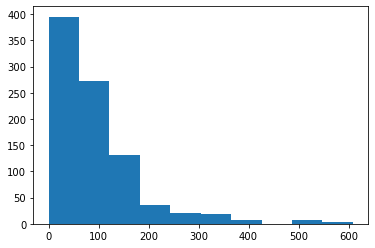

In [191]:
plt.hist(result['Overpay'])
plt.show()

Примеры того, что можно делать с помощью библиотеки, можно посмотреть здесь:

* https://matplotlib.org/gallery/index.html
    
    
Я покажу пару примеров, и их достаточно для случаев, когда надо быстро хоть что-нибудь нарисовать. Но будет лучше, если вы самостоятельно прочитаете основы
* https://matplotlib.org/tutorials/index.html


Есть и другие библиотеки, но они почти все на основе матплотлиба, так что его знать надо. Пример расширения возможностей: [seaborn](https://seaborn.pydata.org/)

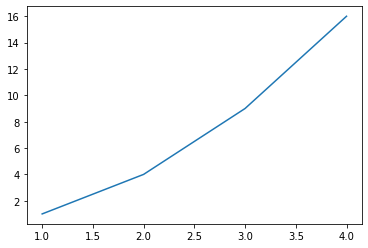

In [192]:
plt.plot([1,2,3,4], [1,4,9,16])
plt.show()

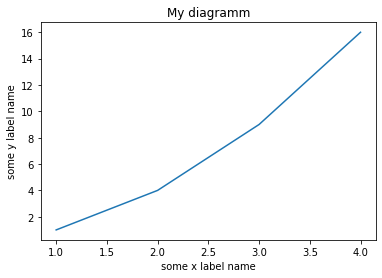

In [193]:
plt.plot([1,2,3,4], [1,4,9,16])
plt.xlabel('some x label name')
plt.ylabel('some y label name')
plt.title('My diagramm')
plt.show()

In [194]:
x = list(range(-100,100))
y = list(map(lambda t: t**2, x))

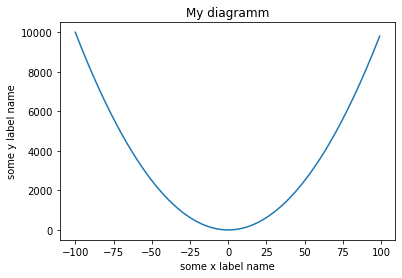

In [195]:
plt.plot(x,y)
plt.xlabel('some x label name')
plt.ylabel('some y label name')
plt.title('My diagramm')
plt.show()

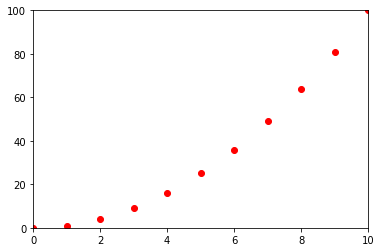

In [201]:
plt.plot(x, y, 'ro')
plt.axis([0, 10, 0, 100])
plt.show()

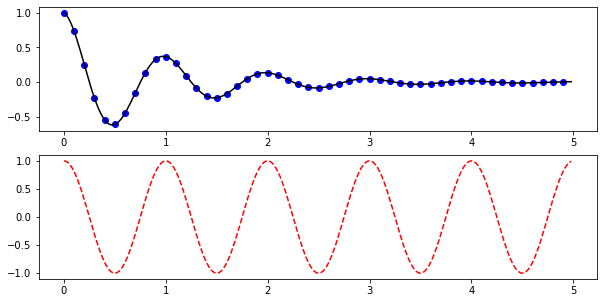

In [210]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(10,5))

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

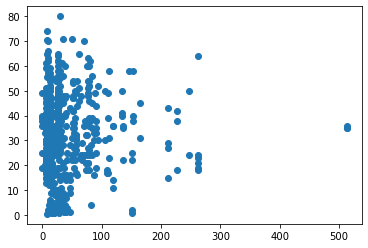

In [211]:
plt.scatter(titanic_data['Fare'], titanic_data['Age'])

**Что знаем и умеем?**

* Усвоили как рисовать простейшие графики
    * график функции по точкам
    * гистограмма
    * диаграма рассеивания
* Умеем подписать оси, дать заголовок графику, заменить цвета
* Умеем нарисовать несколько графиков в одном